In [185]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import heapq as h
import random
from time import time
import scipy.optimize as opt

In [341]:
#adjacency matrix A, start node s, end node t
def dij_mat(A, s, t, heap = True):
    A = np.array(A)
    
    if len(A.shape) != 2 or A.shape[0] != A.shape[1]:
        print("array A not square")
        return -1
    
    n_index = A.shape[0]
    
    seen = [False for i in range(n_index)]
    
    
    if heap:
        # format of queue is (cost, node, path from s)
        q = [(0, s, [])]
    
        while q:
            (cost, u, path) = h.heappop(q)
            if not seen[u]:
                seen[u] = True
                path = path + [u]

                if u == t:
                    return cost

                for v,c in enumerate(A[u]):
                    if not seen[v] and c:
                        h.heappush(q, (cost + c, v, path))
                        
    else:
        
        l = [(0, s, [])]
        
        while l:
            (cost, u, path) = l.pop()
            if not seen[u]:
                seen[u] = True
                path = path + [u]

                if u == t:
                    return cost

                for v,c in enumerate(A[u]):
                    if not seen[v] and c:
                        l.append((cost + c, v, path))
                        l = sorted(l, reverse=True)

    print("could not find path")
    return float("inf")

def dij_list(L, s, t, heap = True):
    n_index = len(L)
    
    seen = [False for i in range(n_index)]
    
    if heap:
        
        # format of queue is (cost, node, path from s)
        q = [(0, s, [])]

        while q:
            (cost, u, path) = h.heappop(q)
            u = int(u)
            if not seen[u]:
                seen[u] = True
                path = path + [u]

                if u == t:
                    return cost
                for v,c in L[str(u)].items():
                    v = int(v)
                    if not seen[v] and c:
                        h.heappush(q, (cost + c, str(v), path))
    else:
                           
        l = [(0, s, [])]      
        while l:
            (cost, u, path) = l.pop()
            u = int(u)
            if not seen[u]:
                seen[u] = True
                path = path + [u]

                if u == t:
                    return cost

                for v,c in L[str(u)].items():
                    v = int(v)
                    if not seen[v] and c:
                        l.append((cost + c, str(v), path))
                        l = sorted(l, reverse=True)

        

    print("could not find path")
    return float("inf")

def gen_graph_matrix(size, p = 0.9):
    mat = [[np.random.random() * np.random.choice([0,1], p=[1 - p, p]) for j in range(size)] for i in range(size)]
    for i in range(size):
        mat[i][i] = 0
        
    return mat
    
def gen_graph_list(mat):
    l = {}
    
    for i,row in enumerate(mat):
        l[str(i)] = {}
        for j, c in enumerate(row):
            if c > 0:
                l[str(i)][str(j)] = c

    return l

In [342]:
A = gen_graph_matrix(20)
L = gen_graph_list(A)
print(dij_mat(A, 0, 19))
print(dij_mat(A, 0, 19, False))
print(dij_list(L, 0, 19))
print(dij_list(L, 0, 19, False))
# print(dij_list(A, 0, 19, False))

0.146732867811
0.146732867811
0.146732867811
0.146732867811


In [344]:
sizes = [5 * i for i in range(1,40)]
trials = 10

times = {"mat_heap":[[] for x in sizes], "mat_list":[[] for x in sizes], "list_heap":[[] for x in sizes], "list_list":[[] for x in sizes]}

# times = [[] for size in sizes]
# path_lengths = [[] for size in sizes]



for i,size in enumerate(sizes):
    print("SIZE:", size)
    for trial in range(trials):
        X_mat = gen_graph_matrix(size)
        X_list = gen_graph_list(X_mat)
        
        tic = time()
        dij_mat(X_mat, 0, size - 1)
        toc = time()
        
        times["mat_heap"][i].append(toc - tic)
        
        tic = time()
        dij_mat(X_mat, 0, size - 1, False)
        toc = time()
        
        times["mat_list"][i].append(toc - tic)
        
        tic = time()
        dij_list(X_list, 0, size - 1)
        toc = time()
        
        times["list_heap"][i].append(toc - tic)
        
        tic = time()
        dij_list(X_list, 0, size - 1, False)
        toc = time()
        
        times["list_list"][i].append(toc - tic)
        
    

SIZE: 5
SIZE: 10
SIZE: 15
SIZE: 20
SIZE: 25
SIZE: 30
SIZE: 35
SIZE: 40
SIZE: 45
SIZE: 50
SIZE: 55
SIZE: 60
SIZE: 65
SIZE: 70


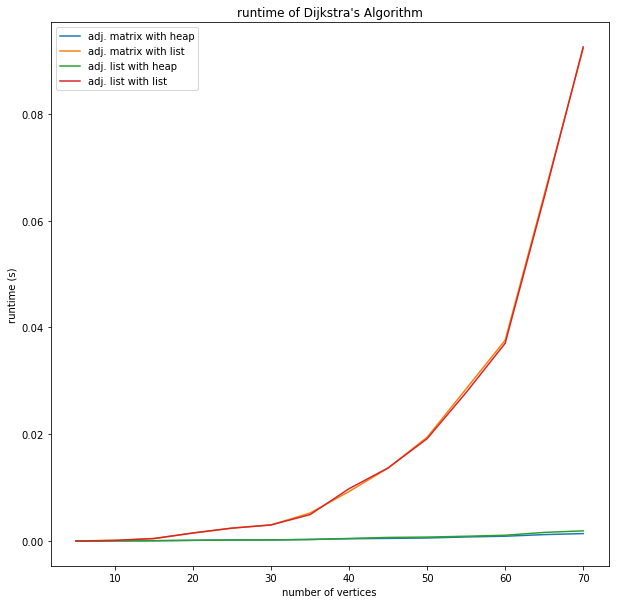

In [345]:
plt.figure(figsize=(10,10))

plt.subplot(211)

means = [np.mean(x) for x in times]
param = opt.curve_fit(lambda t,a: a * t ** 2 * np.log(t),  sizes,  means)


plt.plot(sizes, [np.mean(x) for x in times["mat_list"]], label = "adj. matrix with list")

plt.plot(sizes, [np.mean(x) for x in times["list_list"]], label = "adj. list with list")

plt.legend()
plt.title("runtime of Dijkstra's Algorithm")
plt.xlabel("number of vertices")
plt.ylabel("runtime (s)")

plt.plot(sizes, [np.mean(x) for x in times["mat_heap"]], label = "adj. matrix with heap")
plt.plot(sizes, [np.mean(x) for x in times["list_heap"]], label = "adj. list with heap")


plt.subplot(212)
plt.plot(sizes, [np.mean(x) for x in path_lengths])

In [333]:
[np.mean(x) for x in times["mat_heap"]]

[5.1736831665039062e-05,
 2.288818359375e-05,
 2.7179718017578125e-05,
 2.574920654296875e-05,
 2.4080276489257812e-05,
 2.47955322265625e-05,
 2.9802322387695312e-05,
 2.09808349609375e-05,
 9.7751617431640625e-06,
 1.4066696166992188e-05,
 7.0095062255859375e-05,
 5.1975250244140625e-05,
 5.7220458984375e-05,
 4.5061111450195312e-05,
 7.6055526733398438e-05,
 3.1948089599609375e-05,
 7.3909759521484375e-05,
 6.198883056640625e-05,
 5.8889389038085938e-05,
 6.9856643676757812e-05,
 3.7908554077148438e-05,
 7.2002410888671875e-05,
 0.00011324882507324219,
 9.2983245849609375e-05,
 8.8930130004882812e-05,
 5.817413330078125e-05,
 0.00013017654418945312,
 0.00012516975402832031,
 4.1961669921875e-05,
 5.6028366088867188e-05,
 0.00030589103698730469,
 0.00016307830810546875,
 0.00014328956604003906,
 0.00017476081848144531,
 0.00015306472778320312,
 0.00018405914306640625,
 0.0001010894775390625,
 7.5101852416992188e-05,
 8.487701416015625e-05,
 0.00014495849609375,
 5.817413330078125e-05